#ANHA4 Tracer Simulation Results

In [2]:
import sys
sys.path.insert(0, '_libs/')

In [3]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [4]:
def plot_map(nav_lon, nav_lat, Ba_mask, lev1, cmap, title, ax):
    proj=Basemap(projection='ortho',lon_0=-40, lat_0=40, resolution='l', ax=ax)
    proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
    proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
    x, y=proj(nav_lon, nav_lat)

    CS=proj.contourf(x, y, Ba_mask, lev1, cmap=cmap, extend='both')
    proj.contour(x, y, Ba_mask, lev1, linewidths=1.5, colors=('gray',))
    
    ax.set_title(title, fontsize=14)
    return CS

In [5]:
def plot_Arctic(nav_lon, nav_lat, var, lev, cmap, title, ax):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')

    x, y=proj(nav_lon, nav_lat)

    CS=proj.contourf(x, y, var, lev, cmap=cmap, extend='both')
    proj.contour(x, y, var, lev, linewidths=0.5, colors=('gray',))
    ax.set_title(title, fontsize=14)
    return CS, proj

In [6]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary_ANHA4.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
#Ba_boundary=Boundary_Mat['Ba_boundary']
domain = Boundary_Mat['domain'].T

In [7]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ANHA4_Ba.mat')
Ba_ini_ANHA4 = MAT['Ba_ini_ANHA4']

In [8]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP03_5d_20100101_20100304_ptrc_T.nc')
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [9]:
L = 0
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]
lev3 = [-6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
lev4 = [49, 49.25, 49.5, 49.75, 50, 50.25, 50.5, 50.75, 51]

# After 6000 timesteps (about 3.5 months)

## Check the river dilution

* tra = 0
* Ba_ini = 50.0
* Ba_boundary = 50.0
* emps = 0.0
* Comparing results with/without the dilution in `trcsbc.F90`

In [10]:
# Ba
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP09_5d_20100101_20100220_ptrc_T.nc')
Ba1 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba1 = ptrc_obj.variables['Ba'][:, 0, 600, 450]
# Ba
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP10_5d_20100101_20100220_ptrc_T.nc')
Ba2 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba2 = ptrc_obj.variables['Ba'][:, 0, 600, 450]

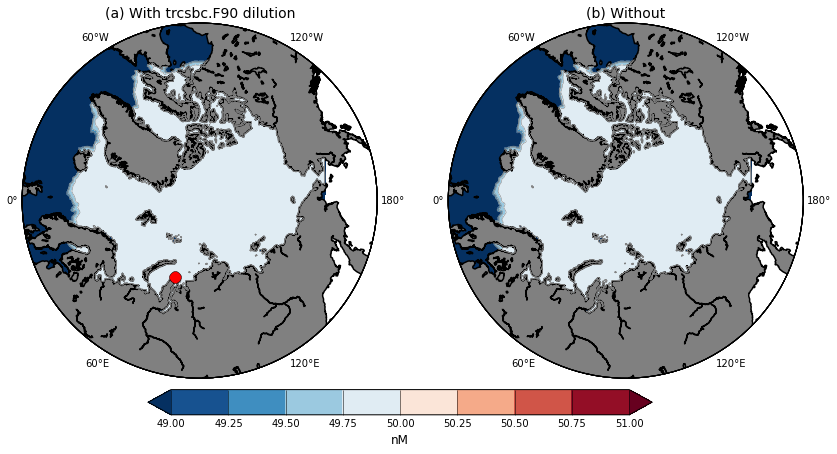

In [13]:
fig=plt.figure(figsize=(14, 14));

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

CS, proj = plot_Arctic(nav_lon, nav_lat, Ba1[L, :, :], lev4, plt.cm.RdBu_r, '(a) With trcsbc.F90 dilution', ax1)

x, y=proj(nav_lon, nav_lat)
proj.plot(x[600, 450], y[600, 450], 'ro', ms=12)
CS, proj = plot_Arctic(nav_lon, nav_lat, Ba2[L, :, :], lev4, plt.cm.RdBu_r, '(b) Without', ax2)
cax = fig.add_axes([0.25, 0.3, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=25)
CBar.set_ticks(lev4)

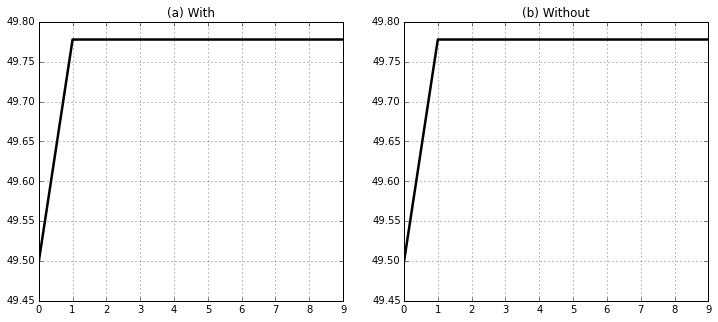

In [14]:
fig=plt.figure(figsize=(12, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

ax1.plot(Ob_Ba1, 'k-', linewidth=2.5); ax1.grid()
ax1.set_title('(a) With')

ax2.plot(Ob_Ba2, 'k-', linewidth=2.5); ax2.grid()
ax2.set_title('(b) Without')

## d18O

In [26]:
#fig = plt.figure(figsize=(14, 14))
#ax = fig.gca()
#
#CS = plot_map(nav_lon, nav_lat, d18O[L, :, :], lev3, "Susan's trnnxt.F90", ax)
#cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
#CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
#CBar.set_label('nM', fontsize=12)
#CBar.ax.tick_params(axis='x', length=25)
#CBar.set_ticks(lev3)

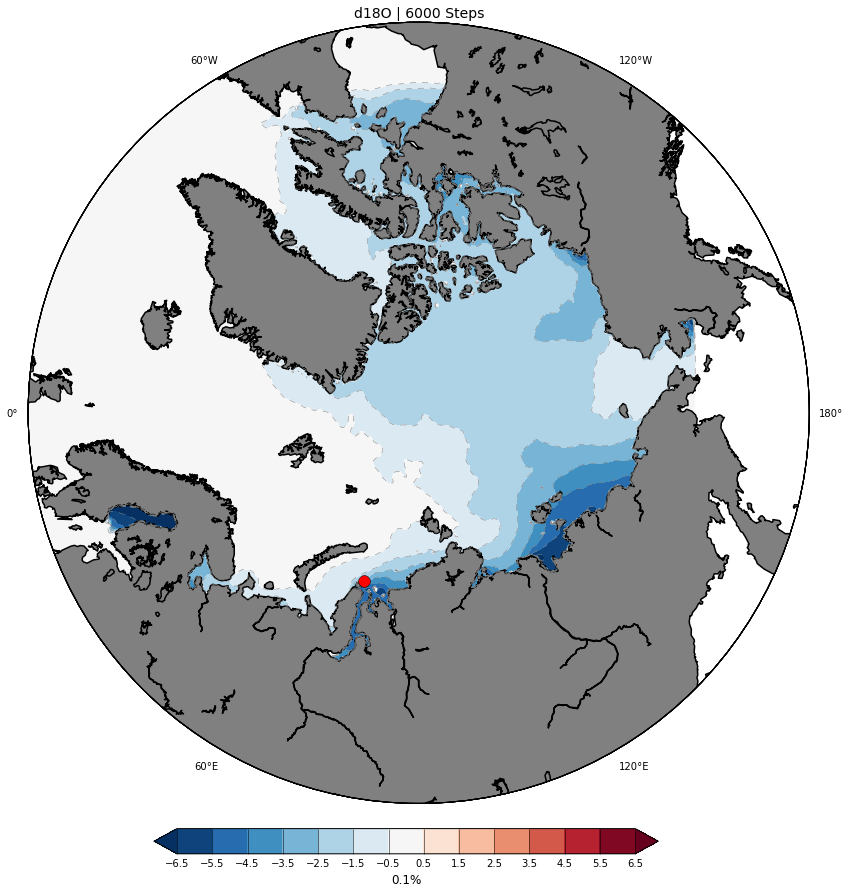

In [48]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()

CS, proj = plot_Arctic(nav_lon, nav_lat, d18O[L, :, :], lev3, plt.cm.RdBu_r, 'd18O | 6000 Steps', ax)

x, y=proj(nav_lon, nav_lat)
proj.plot(x[600, 450], y[600, 450], 'ro', ms=12)

cax = fig.add_axes([0.25, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('0.1%', fontsize=12)
CBar.ax.tick_params(axis='x', length=25)
CBar.set_ticks(lev3)

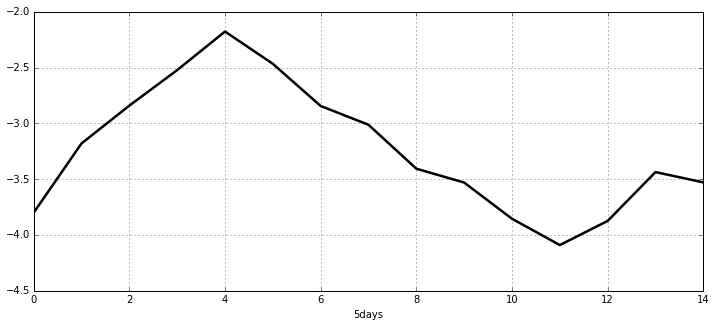

In [29]:
fig=plt.figure(figsize=(12, 5)); ax=plt.gca()
ax.plot(Ob_d18O, 'k-', linewidth=2.5); ax.grid()
ax.set_xlabel('5days')